In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal,seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
siguniang = pd.read_csv('Mt_Siguniang_2018-2020.csv', index_col='Date', parse_dates = ['Date'])
siguniang = siguniang.fillna(method="ffill")
siguniang.head()

,Tourist_Arrival_volume
Date,
2018-01-01,1074.0
2018-01-02,294.0
2018-01-03,196.0
2018-01-04,174.0
2018-01-05,192.0


In [3]:
siguniang.tail()

,Tourist_Arrival_volume
Date,
2020-01-24,152.0
2020-01-25,228.0
2020-01-26,599.0
2020-01-27,331.0
2020-01-28,253.0


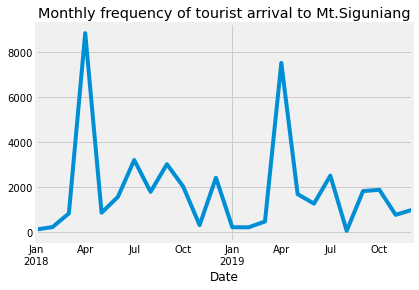

In [3]:
siguniang["Tourist_Arrival_volume"].asfreq('M').plot()
plt.title('Monthly frequency of tourist arrival to Mt.Siguniang')
plt.show()

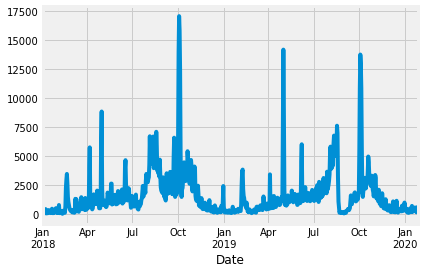

In [4]:
siguniang["Tourist_Arrival_volume"].plot()
plt.show()

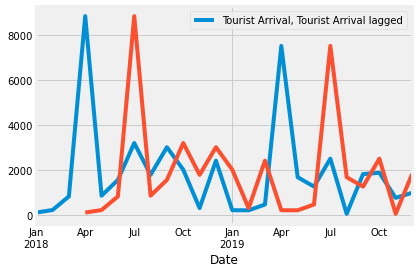

In [5]:
siguniang["Tourist_Arrival_volume"].asfreq('M').plot(legend=True)
shifted = siguniang["Tourist_Arrival_volume"].asfreq('M').shift(3).plot(legend=True)
shifted.legend(['Tourist Arrival, Tourist Arrival lagged'])
plt.show()

In [6]:
siguniang.shape

(758, 1)

In [7]:
siguniang1 = siguniang.resample('3D').mean()
siguniang1.head()

,Tourist_Arrival_volume
Date,
2018-01-01,521.333333
2018-01-04,229.000000
2018-01-07,185.000000
2018-01-10,107.000000
2018-01-13,295.000000


In [8]:
siguniang1.shape

(253, 1)

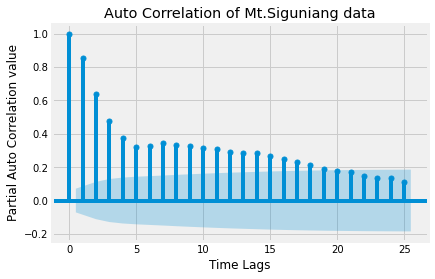

In [4]:
plot_acf(siguniang["Tourist_Arrival_volume"], lags=25, title="Auto Correlation of Mt.Siguniang data")
plt.xlabel("Time Lags")
plt.ylabel("Partial Auto Correlation value")
plt.show()

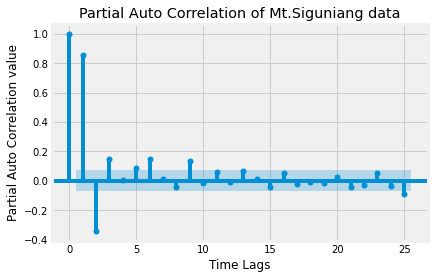

In [5]:
plot_pacf(siguniang["Tourist_Arrival_volume"], lags=25, title="Partial Auto Correlation of Mt.Siguniang data")
plt.xlabel("Time Lags")
plt.ylabel("Partial Auto Correlation value")
plt.show()

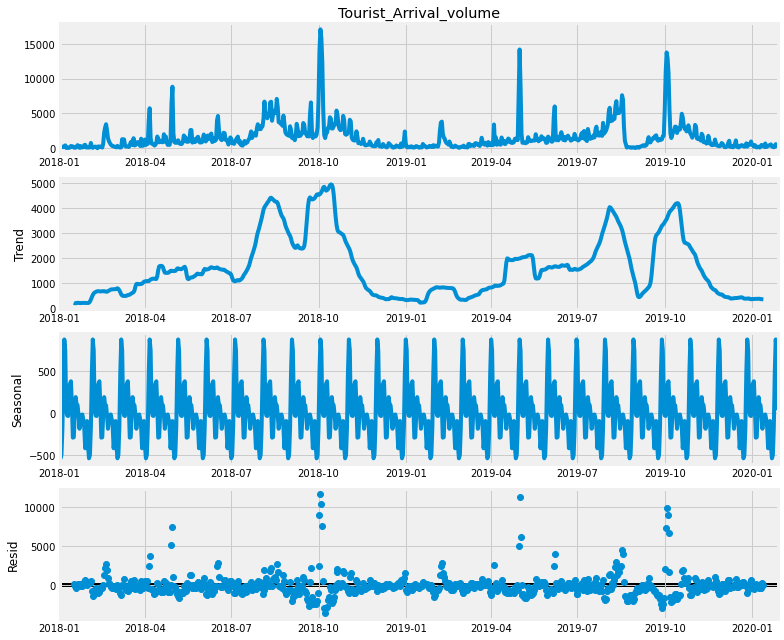

In [11]:
rcParams['figure.figsize'] = 11, 9
decomposed_siguniang_volume = sm.tsa.seasonal_decompose(siguniang["Tourist_Arrival_volume"],freq=30)
figure = decomposed_siguniang_volume.plot()
plt.show()

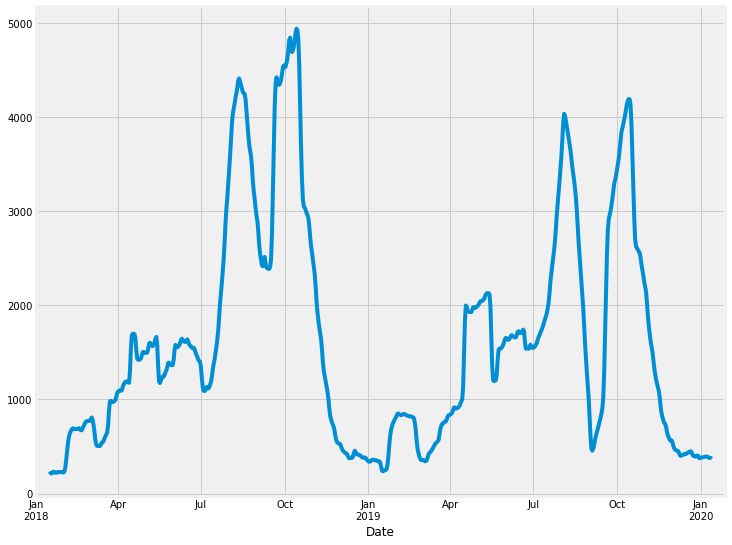

In [12]:
decomposed_siguniang_volume.trend.plot()
plt.show()

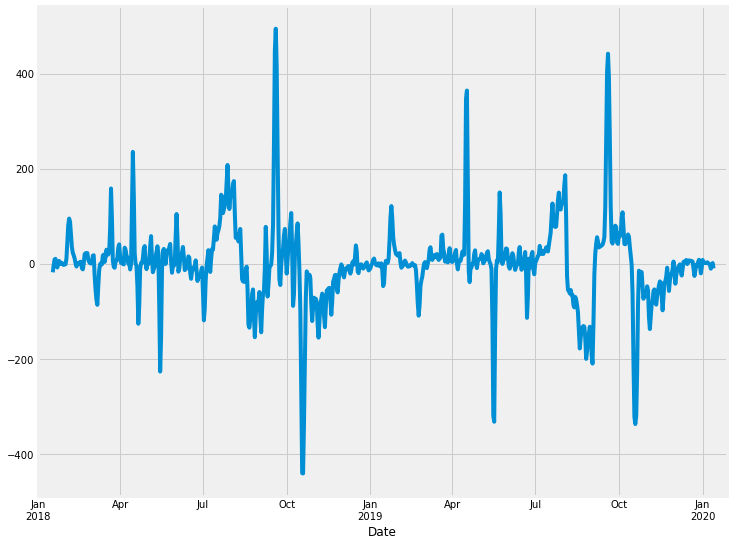

In [13]:
decomposed_siguniang_volume.trend.diff().plot()
plt.show()

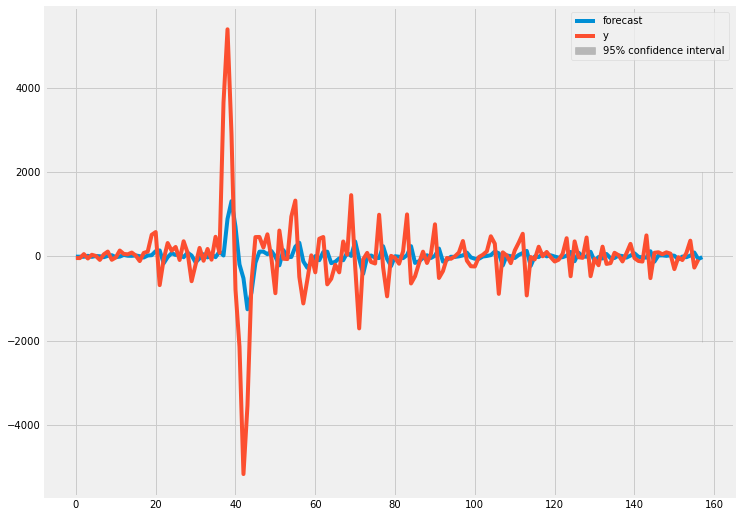

In [14]:
#Prediction using Auto Regressive model with lag 1
tourists = ARMA(siguniang["Tourist_Arrival_volume"].diff().iloc[1:].values, order=(1,0))
result = tourists.fit()
result.plot_predict(start=600, end=757)
plt.show()

In [15]:
rmse = math.sqrt(mean_squared_error(siguniang["Tourist_Arrival_volume"].diff().iloc[700:757].values, result.predict(start=700,end=756)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 218.90971428225905.


In [16]:
print('MAPE: ', mean_absolute_percentage_error(siguniang["Tourist_Arrival_volume"].diff().iloc[700:757].values, result.predict(start=700,end=756)))

MAPE:  86274476634725.81


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  757
Model:                     ARMA(0, 1)   Log Likelihood               -6314.636
Method:                       css-mle   S.D. of innovations           1014.992
Date:                Sun, 01 May 2022   AIC                          12635.271
Time:                        16:02:33   BIC                          12649.159
Sample:                             0   HQIC                         12640.620
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4388     49.646     -0.029      0.977     -98.744      95.866
ma.L1.y        0.3462      0.036      9.677      0.000       0.276       0.416
                                    Roots           

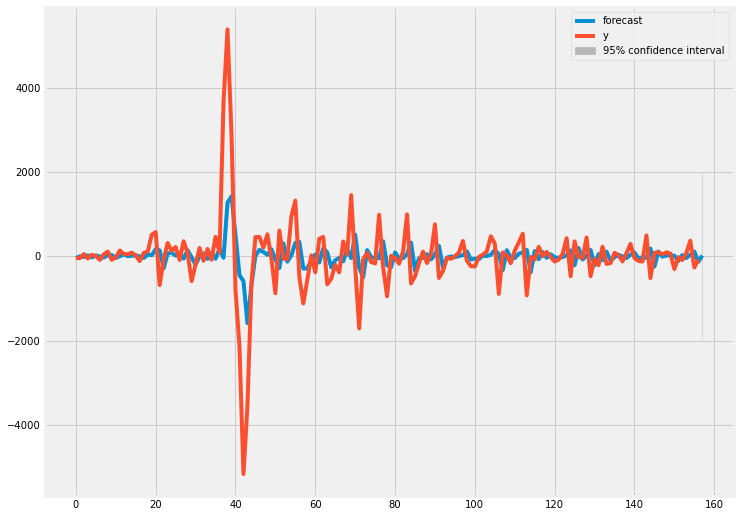

In [17]:
model = ARMA(siguniang["Tourist_Arrival_volume"].diff().iloc[1:].values,order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=600, end=757)
plt.show()

In [18]:
rmse = math.sqrt(mean_squared_error(siguniang["Tourist_Arrival_volume"].diff().iloc[700:758].values, result.predict(start=700,end=757)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 183.26511385069466.


In [19]:
print('MAPE: ', mean_absolute_percentage_error(siguniang["Tourist_Arrival_volume"].diff().iloc[700:758].values, result.predict(start=700,end=757)))

MAPE:  2834845756713541.0


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  757
Model:                     ARMA(1, 1)   Log Likelihood               -6312.711
Method:                       css-mle   S.D. of innovations           1012.414
Date:                Sun, 01 May 2022   AIC                          12633.422
Time:                        16:02:34   BIC                          12651.939
Sample:                             0   HQIC                         12640.554
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0845     46.792     -0.023      0.982     -92.795      90.626
ar.L1.y       -0.1696      0.090     -1.891      0.059      -0.345       0.006
ma.L1.y        0.4876      0.078      6.280      0.0

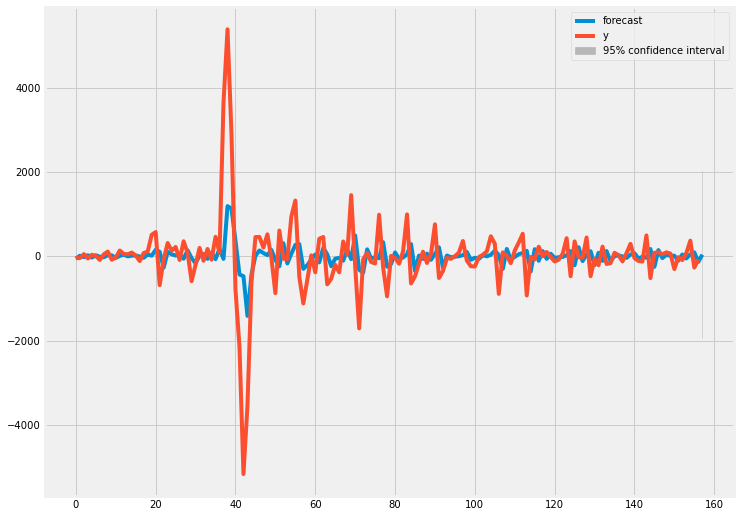

In [20]:
#Using ARMA(1,1) model
model = ARMA(siguniang["Tourist_Arrival_volume"].diff().iloc[1:].values, order=(1,1))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=600, end=757)
plt.show()

In [21]:
rmse = math.sqrt(mean_squared_error(siguniang["Tourist_Arrival_volume"].diff().iloc[700:758].values, result.predict(start=700,end=757)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 193.63050332735102.


In [22]:
print('MAPE: ', mean_absolute_percentage_error(siguniang["Tourist_Arrival_volume"].diff().iloc[700:758].values, result.predict(start=700,end=757)))

MAPE:  4767362495611212.0


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  756
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -6436.492
Method:                       css-mle   S.D. of innovations           1205.626
Date:                Sun, 01 May 2022   AIC                          12880.985
Time:                        16:02:34   BIC                          12899.497
Sample:                             1   HQIC                         12888.115
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5838     27.069      0.022      0.983     -52.470      53.638
ar.L1.D.y     -0.2900      0.034     -8.454      0.000      -0.357      -0.223
ar.L2.D.y     -0.3311      0.034     -9.665      0.0

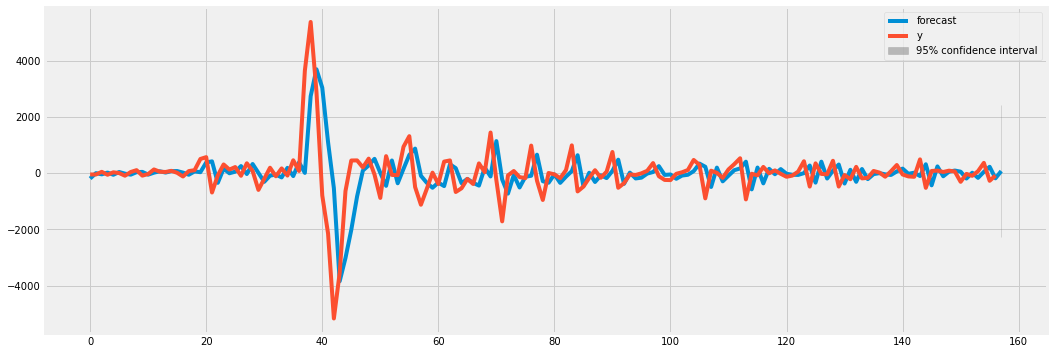

In [23]:
#ARIMA model for prediction
rcParams['figure.figsize'] = 16, 6
model = ARIMA(siguniang["Tourist_Arrival_volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=600, end=757)
plt.show()

In [24]:
rmse = math.sqrt(mean_squared_error(siguniang["Tourist_Arrival_volume"].diff().iloc[600:758].values, result.predict(start=600,end=757)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1159.9748409321423.


In [25]:
print('MAPE: ', mean_absolute_percentage_error(siguniang["Tourist_Arrival_volume"].diff().iloc[600:758].values, result.predict(start=600,end=757)))

MAPE:  937769871469121.0


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  757
Model:               SARIMAX(4, 0, 4)   Log Likelihood               -6254.030
Date:                Sun, 01 May 2022   AIC                          12528.059
Time:                        16:02:39   BIC                          12574.353
Sample:                             0   HQIC                         12545.890
                                - 757                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2103     10.402      0.020      0.984     -20.177      20.597
ar.L1          0.5940      0.068      8.677      0.000       0.460       0.728
ar.L2         -0.8619      0.054    -15.958      0.0

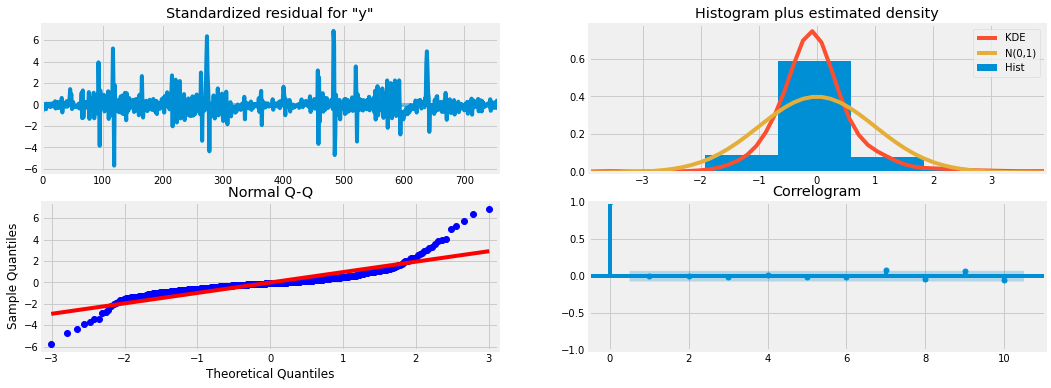

In [26]:
# SARIMAX model
train_sample = siguniang["Tourist_Arrival_volume"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=750)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:752], predicted_result))
print("The root mean squared error is {}.".format(rmse))

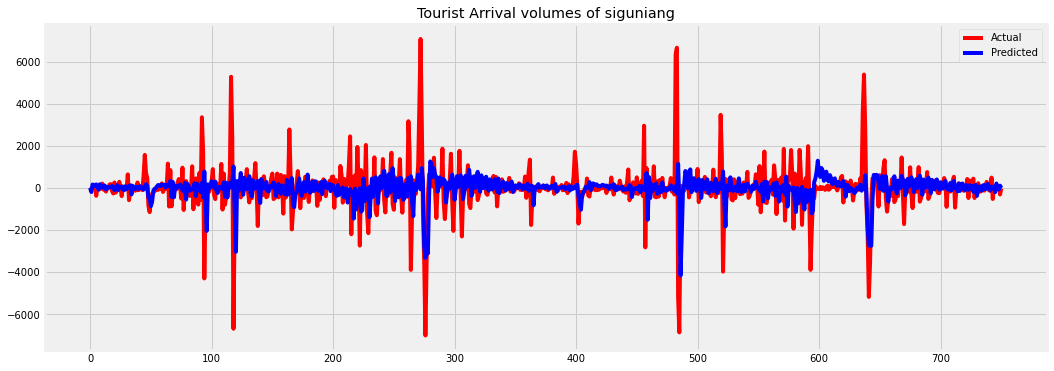

In [27]:
plt.plot(train_sample[1:752],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Tourist Arrival volumes of siguniang')
plt.show()

In [35]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    mctest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF: ",mctest[0])
    print("2. P-Value: ",mctest[1])
    print("3. Num of lags: ", mctest[2])
    print("4. Num of observations used for ADF regression and Critical value calculation: ",mctest[3])
    print("5. Critical values: ")
    for key, val in mctest[4].items():
        print("\t",key,": ",val)

In [36]:
ad_test(siguniang['Tourist_Arrival_volume'])

1. ADF:  -4.863224664093411
2. P-Value:  4.110216733967845e-05
3. Num of lags:  8
4. Num of observations used for ADF regression and Critical value calculation:  749
5. Critical values: 
	 1% :  -3.439110818166223
	 5% :  -2.8654065210185795
	 10% :  -2.568828945705979


In [37]:
from pmdarima import auto_arima
import warnings 
warnings.filterwarnings("ignore")

In [39]:
stepwise_fit = auto_arima(siguniang['Tourist_Arrival_volume'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=12566.027, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=13660.415, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12666.861, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=12982.485, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14030.520, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=12566.297, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=12566.476, Time=0.23 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=12563.835, Time=0.57 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=12562.911, Time=0.35 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=12560.934, Time=0.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=12575.816, Time=0.17 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=12562.856, Time=0.27 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=12564.853, Time=0.83 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=12590.273, Time=0.14 sec

Best model:  ARIMA

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  758
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -6275.467
Date:                Sun, 01 May 2022   AIC                          12560.934
Time:                        19:45:37   BIC                          12584.088
Sample:                             0   HQIC                         12569.851
                                - 758                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    260.4599     64.701      4.026      0.000     133.649     387.271
ar.L1          1.1956      0.016     74.729      0.000       1.164       1.227
ar.L2         -0.5097      0.031    -16.254      0.000      -0.571      -0.448
ar.L3          0.1481      0.024      6.289      0.000       0.102       0.194
sigma2      9.097e+05   2.24e+04     40.702      0.000    8.66e+05    9.54e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5443.70
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             1.33
Prob(H) (two-sided):                  0.14   Kurtosis:                        15.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
print(siguniang.shape)
train=siguniang.iloc[:700]
test = siguniang.iloc[700:]
print(train.shape, test.shape)

(758, 1)
(700, 1) (58, 1)


In [44]:
model = ARIMA(train['Tourist_Arrival_volume'],order=(3,0,0))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARMA Model Results                                
==================================================================================
Dep. Variable:     Tourist_Arrival_volume   No. Observations:                  700
Model:                         ARMA(3, 0)   Log Likelihood               -5819.079
Method:                           css-mle   S.D. of innovations            985.239
Date:                    Sun, 01 May 2022   AIC                          11648.158
Time:                            19:47:53   BIC                          11670.914
Sample:                        01-01-2018   HQIC                         11656.954
                             - 12-01-2019                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1668.9636    216.238      7.718      0.000    1245.144    2092.783
ar.L1.Tourist_Arrival_volume     1.1957      0.037     32.005      0.000       1.122       1.269
ar.L2.Tourist_Arrival_volume    -0.5133      0.055     -9.274      0.000      -0.622      -0.405
ar.L3.Tourist_Arrival_volume     0.1462      0.037      3.916      0.000       0.073       0.219
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2863           -0.0000j            1.2863           -0.0000
AR.2            1.1117           -2.0199j            2.3057           -0.1699
AR.3            1.1117           +2.0199j            2.3057            0.1699
-----------------------------------------------------------------------------
"""

In [45]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start, end=end, typ='levels')
print(pred)

2019-12-02     741.626273
2019-12-03     945.690357
2019-12-04    1132.580368
2019-12-05    1263.238647
2019-12-06    1353.382151
2019-12-07    1421.433307
2019-12-08    1475.640602
2019-12-09    1518.709420
2019-12-10    1552.334981
2019-12-11    1578.361903
2019-12-12    1598.521300
2019-12-13    1614.184154
2019-12-14    1626.370960
2019-12-15    1635.851379
2019-12-16    1643.222388
2019-12-17    1648.951979
2019-12-18    1653.405863
2019-12-19    1656.868416
2019-12-20    1659.560389
2019-12-21    1661.653252
2019-12-22    1663.280313
2019-12-23    1664.545235
2019-12-24    1665.528622
2019-12-25    1666.293139
2019-12-26    1666.887499
2019-12-27    1667.349573
2019-12-28    1667.708805
2019-12-29    1667.988083
2019-12-30    1668.205202
2019-12-31    1668.373998
2020-01-01    1668.505225
2020-01-02    1668.607245
2020-01-03    1668.686558
2020-01-04    1668.748219
2020-01-05    1668.796156
2020-01-06    1668.833424
2020-01-07    1668.862397
2020-01-08    1668.884922
2020-01-09  

<AxesSubplot:xlabel='Date'>

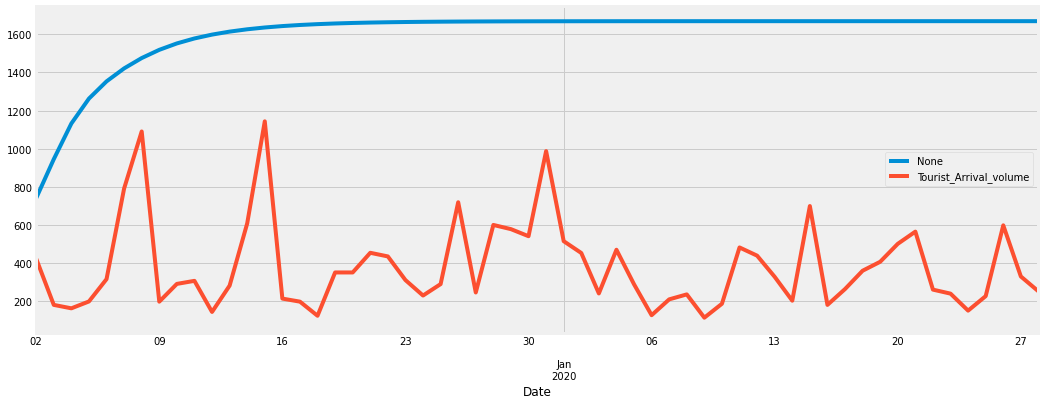

In [47]:
pred.plot(legend=True)
test['Tourist_Arrival_volume'].plot(legend=True)